## MSBC 5070 Survey for Business Analytics 

# Final Group Project Report

<b>Group Members:</b>  Michael Anthony, Samuel Statton, Yubing Yang and Bonnie Tang

<b>Section:</b> MW 9am to 12:15pm

## Project Overview

Emerging markets are a critical part of the global economy; understanding consumer behavior in emerging markets can open high ROI opportunities and offer insights in the future of global trade.

For this project we studied consumer behavior in Myanmar by analyzing data from three super markets in Myanmar located in different cities. These markets collected data for three months and recorded attributes including a timestamp of the transaction,the product line of the transaction (such as health an beauty, food and beverage, etc), the gender of the buyer, membership status, branch/city of the transaction, and the purchase method (cash, credit, digital).

This data was publicly available and can be accesed by following this link:
https://www.kaggle.com/aungpyaeap/supermarket-sales

It is possible that the kaggle data set could be altered or move locations, the original csv can be accessed here:
https://drive.google.com/file/d/1S3NcAt-6u9GBJsb0sTkfTXL6B0hcmF3P/view?usp=sharing

## Data Cleaning and Structuring

#### Import Libraries

In [2]:
import pandas as pd, numpy as np, seaborn as sns
from datetime import datetime
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt 
from plotnine import *
import calendar as cl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Importing the Data

In [3]:
#Save the CSV to the same directry as this jupyter file
#read in the file and view the data
shop=pd.read_csv('supermarket_sales - Sheet1.csv')
shop.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


After loading and viewing the data we can made a few data quality observations, we noticed many attributes were categorical such as gender, product line and payment method. We also noticed both branch and city were listed which were equivalent and redundant for our analysis.

#### Data Cleaning and Structring

We took three steps to clean the data set:
1. Changed column names to easy to use abreviated versions
- Converted non-numeric categorical data to numeric data
- Converted dates to datetime format

In [4]:
#Supermarket column rename
ss=shop.copy() # create a copy
ss.rename(columns={
    'Invoice ID':'invoice_id','Branch':'branch','City':'city','Customer type':'cust_type','Gender':'gender',\
    'Product line':'product_line','Unit price':'unit_price','Quantity':'qty','Tax 5%':'tax_5','Total':'total',\
    'Date':'date','Time':'time','Payment':'payment','gross margin percentage':'gmp','gross income':'g_income',\
    'Rating':'rating'},inplace=True) 

#change date and time columns to DateTime & Timedelta
ss.date = pd.to_datetime(ss.date)
ss.time = pd.to_timedelta(ss.time+':00')

#create dummy columns
dum= pd.get_dummies(ss,columns=['cust_type','gender','product_line','payment'])

dumTime = pd.get_dummies(ss,columns=['cust_type','product_line','gender','payment'])
dumTime.columns.values[-11:]=['electronics',
                              'fashion',
                              'food_beverages',
                              'health_beauty',
                              'home_lifestyle',
                              'sports_travel',
                              'female',
                              'male',
                              'cash',
                              'credit_card',
                              'ewallet']
#view statistics for new data set
dumTime.describe().head()

,unit_price,qty,tax_5,total,time,cogs,gmp,g_income,rating,cust_type_Member,...,fashion,food_beverages,health_beauty,home_lifestyle,sports_travel,female,male,cash,credit_card,ewallet
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,0 days 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,0.501000,...,0.178000,0.174000,0.152000,0.160000,0.166000,0.501000,0.499000,0.344000,0.311000,0.345000
std,26.494628,2.923431,11.708825,245.885335,0 days 03:11:31.667297,234.17651,6.220360e-14,11.708825,1.71858,0.500249,...,0.382704,0.379299,0.359201,0.366789,0.372267,0.500249,0.500249,0.475279,0.463134,0.475606
min,10.080000,1.000000,0.508500,10.678500,0 days 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.875000,3.000000,5.924875,124.422375,0 days 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Trends

#### Sales totals by Product Line


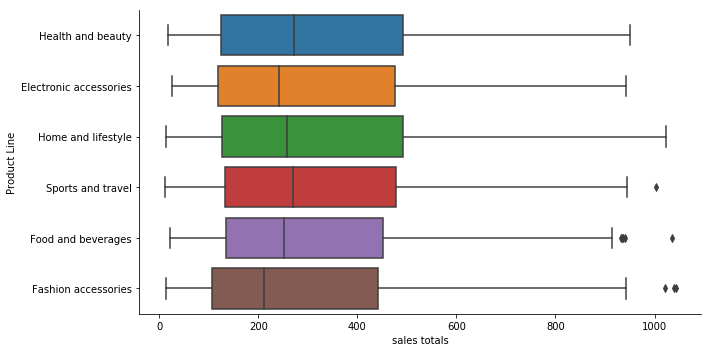

In [5]:
ax=sns.catplot(x='total',y='product_line', data=ss, kind='box', aspect = 2)
ax.set(xlabel='sales totals', ylabel='Product Line')
plt.show()

#### Purchasing Trends by Gender

Based on the horizontal bar chart of "Total Sales for Prooduct Lines by Gender", "Sports and travel" and "Electronic accessories" product lines has similar sales volumns on males and females.

Female populations are much larger than males for three productlines: "Home and lifesyle", "Food and beverages", and "Fashion accessories".

Only "Health and beauty" product line has obviously more population on males.

Text(0.5, 1.0, 'Total Sales for Prooduct Lines by Gender')

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1cc4b5b4fd0>,
 <a list of 6 Text yticklabel objects>)

Text(0.5, 0, 'Sales ($)')

Text(0, 0.5, 'Product Line')

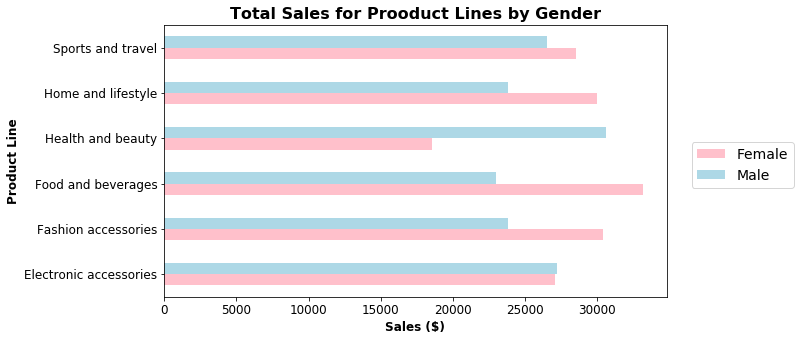

In [6]:
# Sales totals for Male and Female Customers by Product Line

# Data
plg_count=ss.groupby('product_line').apply(lambda x:x.groupby('gender')['total'].sum()).reset_index()
plg_count.columns.name=''

# Chart
plg=plg_count.plot.barh(color=['pink','lightblue'],figsize=(9,5))
y=np.arange(len(plg_count.index))
ylabel=plg_count.iloc[:,0]
plt.title('Total Sales for Prooduct Lines by Gender',fontsize=16,fontweight='bold')
plt.legend(fontsize=14,loc=(1.05,0.4))
#plt.xlim([0,100])
plt.xticks(fontsize=12)
plt.yticks(y,ylabel,fontsize=12)
plt.xlabel('Sales ($)',fontsize=12,fontweight='bold')
plt.ylabel('Product Line',fontsize=12,fontweight='bold')
plt.savefig('salse_gender_productLine.png')

#### Most and Least Popular Product Line' by Gender

According to the tables shown below, the most poplular product line for femals is "Fashion accessories"; 
and the most popular product line for males is "Health and beauty".

The least poplular product line for females is "Health and beauty"; 
and the leat poplular product line for males is "Sports and travel".

In [7]:
# the most popular product line of male and female
a=ss.groupby('gender').apply(lambda x:x.groupby('product_line')['product_line'].size().nlargest(1)).to_frame()
a.rename(columns={'product_line':'size'})
# the least polular product line of male and female
b=ss.groupby('gender').apply(lambda x:x.groupby('product_line')['product_line'].size().nsmallest(1)).to_frame()
b.rename(columns={'product_line':'size'})

,,size
gender,product_line,
Female,Fashion accessories,96
Male,Health and beauty,88


,,size
gender,product_line,
Female,Health and beauty,64
Male,Sports and travel,78


#### Shoper Counts by Time of Day

Shopping time is categorized to four time periods of a day: morning, near noon, afternoon and evening. Different shopping time has tramendously different population volumns. Based on the dataset, most people goes to supermarket in afternoon; and the fewest people goes to supermarket at near noon because it's normal lunch time. Evening is the second popluar time for people going shopping (results are shown by bar chart below).

In [8]:
# extract columns: genter and time from ss
import datetime as dt
ss['period']=ss.time.apply(lambda x: 'A: morning' if x < dt.timedelta(hours=11,minutes=30)\
                                 else 'B: near noon' if x < dt.timedelta(hours=12,minutes=30)\
                                 else 'C: afternoon' if x < dt.timedelta(hours=18,minutes=0)\
                                 else 'D: evening')
# count populations shopping in different time periods
pn=ss.groupby('period')['period'].size().to_frame()
pn['period_']=pn.index
pn=pn.reset_index(drop=True)
pn

,period,period_
0,143,A: morning
1,87,B: near noon
2,489,C: afternoon
3,281,D: evening


In [9]:
# define a function to label bar charts
def autolabel(rects):
    #add value labels to each bar
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space=5
        plt.annotate(x_value,(x_value, y_value),xytext=(space, 0),
                     textcoords="offset points",va='center',fontsize=13) 

Text(0.5, 1.0, 'Population Shopping in Different Time Period')

(0, 600)

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1cc4badc550>,
 <a list of 4 Text yticklabel objects>)

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Time Period')

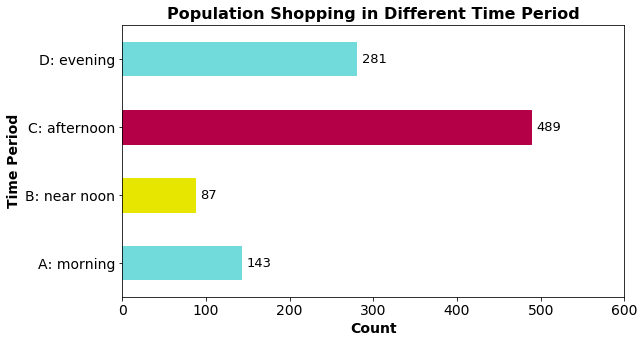

In [10]:
# plot horizontal bar chart for pg_count
pp=pn.plot.barh('period_','period',color=['#71dada'],figsize=(9,5),legend=False)
y=np.arange(len(pn.index))
ylabel=pn.iloc[:,1]
plt.title('Population Shopping in Different Time Period',fontsize=16,fontweight='bold')
#plt.legend(fontsize=14,loc=(0.75,0.75))
plt.xlim([0,600])
plt.xticks(fontsize=14)
plt.yticks(y,ylabel,fontsize=14)
plt.xlabel('Count',fontsize=14,fontweight='bold')
plt.ylabel('Time Period',fontsize=14,fontweight='bold')
pp.patches[2].set_color('#b30047')
pp.patches[1].set_color('#e6e600')
autolabel(pp.patches)
plt.show()

#### Sales Totals by Day of the Week

According to the chart showing below, all days of week has quite large volumn of people going shopping. However, relaively speaking, most people goes shopping on Saturday and Monday has the fewest people going shopping.

,date_w,total
0,Sun,44457.8925
1,Mon,37899.0780
2,Tue,51482.2455
3,Wed,43731.1350
4,Thu,45349.2480
5,Fri,43926.3405
6,Sat,56120.8095


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

Text(0.5, 1.0, 'Sales for Days of Week')

(0, 70000)

Text(0.5, 0, 'Week Day')

Text(0, 0.5, 'Sales ($)')

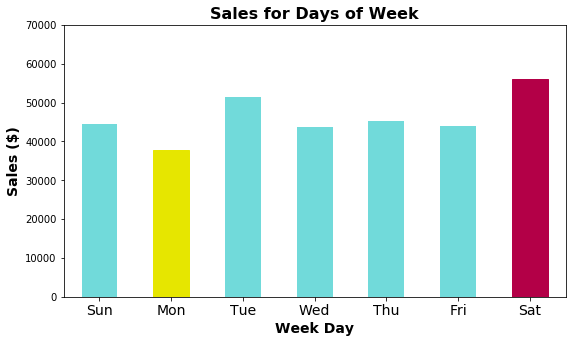

In [11]:
# bar chart of sales for days of week
# data
ss['date_w']=ss.date.apply(lambda x:x.date().strftime('%w'))
ws=ss.groupby(['date_w'])['total'].sum().to_frame().reset_index()
ws.date_w=list(cl.day_abbr)[-1:]+list(cl.day_abbr)[:-1]
ws
# chart
wsp=ws.plot.bar('date_w','total',color=['#71dada'],figsize=(9,5),legend=False)
plt.xticks(rotation=0,fontsize=14)
plt.title('Sales for Days of Week',fontsize=16,fontweight='bold')
wsp.patches[6].set_color('#b30047')
wsp.patches[1].set_color('#e6e600')
wsp.set_ylim([0,70000])
wsp.set_xlabel('Week Day',fontsize=14,fontweight='bold')
wsp.set_ylabel('Sales ($)',fontsize=14,fontweight='bold')

#### Gross Income by Product Line for Members and Non Members

Given the chart below, most of the product lines are uniform when broken down by the customer type. In terms of their inner quartile range, most product lines share a similar median between members and normal customers. The one exception is the Health and Beauty product line that shows a ~$1 gap between medians of the customer types. This occurance will be further investigated in the next section.

Text(0.5, 0.98, 'Gross Income by Products and Customer Type')

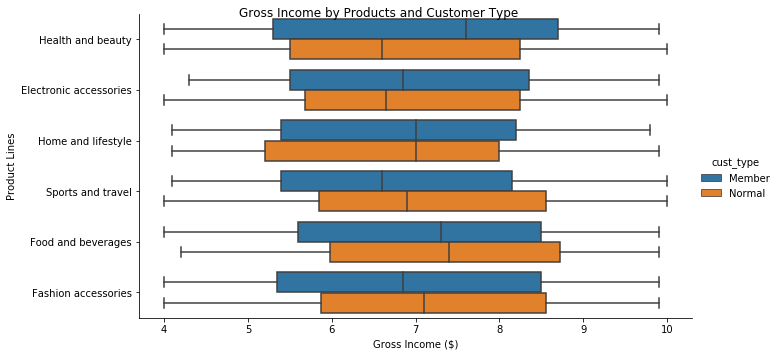

In [12]:
bx2=sns.catplot(y='product_line', x='rating', data=ss, hue='cust_type', kind='box', height=5, aspect=2).set(xlabel='Gross Income ($)', ylabel='Product Lines')
bx2.fig.suptitle('Gross Income by Products and Customer Type')

#### Gross Income by Product Line and City

#### Purchase Counts by Product Line and City

This chart below shown the relationahip between product types and different city, Naypyitaw has low spending on sports and travel but high spending on food and beverages. Yangon has the most sales in the electronica and home_lifestyle category,and Mandalay has most sales on sports and travel


In [13]:
C=dumTime.groupby('city')['fashion','food_beverages','home_lifestyle','sports_travel','health_beauty','electronics'].sum()
P=C.T
P

city,Mandalay,Naypyitaw,Yangon
fashion,62,65,51
food_beverages,50,66,58
home_lifestyle,50,45,65
sports_travel,62,45,59
health_beauty,53,52,47
electronics,55,55,60


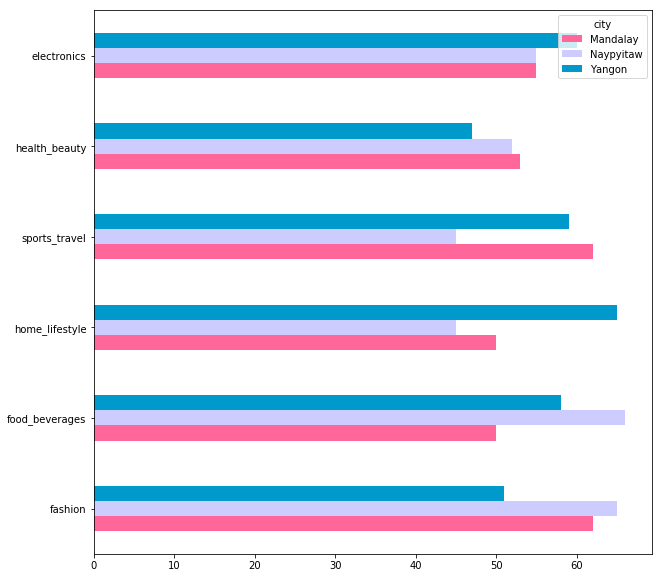

In [14]:
plg=P.plot.barh(color=['#ff6699','#ccccff','#0099cc'],figsize=(10,10))

#### Member and non-Member Trends
Given the singular variance in product line trends, we decided to furter split the data by adding gender into the chart in an attempt to better understand the spending behavior of the customers. As seen below, female purchasing behavior is relatively uniform. But something interesting is happening on the male chart. Male members spend significantly more (around $5) on Health and Beauty products compared to normal customers.

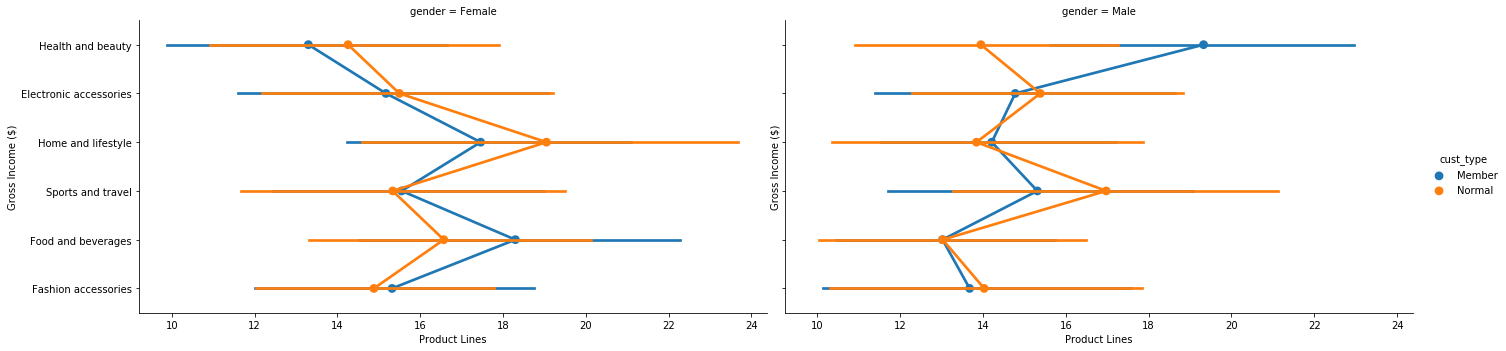

In [15]:
sns.catplot(y='product_line', x='g_income', data=ss, hue='cust_type', col='gender',kind='point', height=5, aspect=2).set(xlabel='Product Lines', ylabel='Gross Income ($)')

#### Gross Income by Branch
One other area that we were interested in was the use of various payments in an emerging market like Myanmar. However, as the chart below shows, there isn't a significant amount of variance in payment types across product lines. Branch B may have a credit card reward system that would explain why it is used the most, but without more meaningful data, it's hard to make any solid conclusions. 

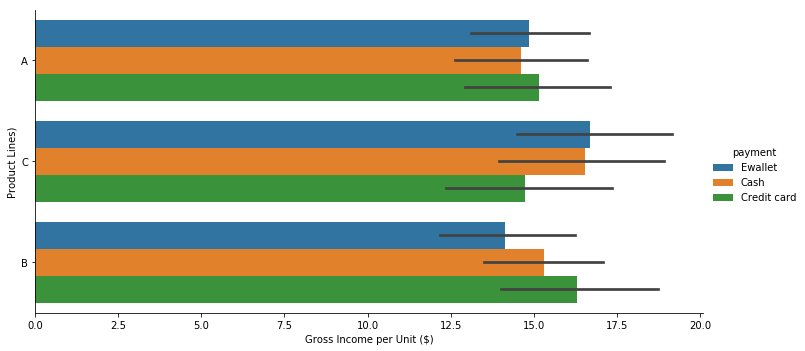

In [16]:
sns.catplot(y='branch', x='g_income', data=ss, hue='payment', kind='bar', height=5, aspect=2).set(xlabel='Gross Income per Unit ($)', ylabel='Product Lines)')

#### Gross Income by Product Line

To analyze profit on different product types, we analysed the relationship between gross income and  products line. As shown below, profit on different product line is from USD2342 to USD2673. The max gross income is on Food and beverages, and min gross income is on Health and beauty 	.	

In [17]:
B=ss.groupby('product_line')[['g_income']].sum().sort_values(by='g_income')
B

,g_income
product_line,
Health and beauty,2342.5590
Home and lifestyle,2564.8530
Fashion accessories,2585.9950
Electronic accessories,2587.5015
Sports and travel,2624.8965
Food and beverages,2673.5640


<BarContainer object of 6 artists>

Text(0, 0.5, 'Product line')

Text(0.5, 0, 'gross income')

Text(0.5, 1.0, 'Relationship between Product line and Gross income')

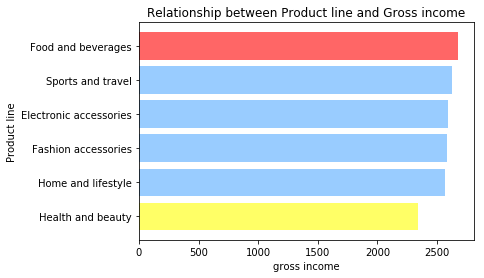

In [18]:
fig,ax=plt.subplots()
def less_color():    
    list=[]
    for i in B['g_income'].values:
        if i==B['g_income'].values.max():
            list.append("#ff6666")
        elif i==B['g_income'].values.min():
            list.append('#ffff66')
        else:
            list.append("#99ccff")
    return list
ax.barh(B.index,B['g_income'].values,color=less_color())
ax.set_ylabel("Product line")  
ax.set_xlabel("gross income")  
ax.set_title("Relationship between Product line and Gross income")  
#plt.xlim([2000,3000])
plt.show()  

#### Spending by Product Line

To analyze customer preferences for product types, we counted the average spend on different products line. As shown below, customer average spend on different product line is from USD305 to USD337. The max average spending is on home and lifestyle, and min average spending is on Fashion accessories.	

In [19]:
prr=ss.groupby('product_line')[['total']].mean()
prr.sort_values(by='total')

,total
product_line,
Fashion accessories,305.089298
Electronic accessories,319.632538
Food and beverages,322.671517
Health and beauty,323.643020
Sports and travel,332.065220
Home and lifestyle,336.636956


<BarContainer object of 6 artists>

Text(0, 0.5, 'Product line')

Text(0.5, 0, 'Average Spend')

Text(0.5, 1.0, 'Relationship between Product line and Average Spend')

(0, 350)

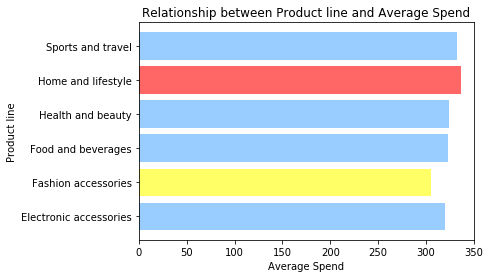

In [20]:
fig,ax=plt.subplots()

def color():
    
    list=[]
    for i in prr['total'].values:
        if i==prr['total'].values.max():
            list.append("#ff6666")
        elif i==prr['total'].values.min():
            list.append('#ffff66')
        else:
            list.append("#99ccff")
    return list



ax.barh(prr.index,prr.total.values,color=color())
ax.set_ylabel("Product line")  
ax.set_xlabel("Average Spend")  
ax.set_title("Relationship between Product line and Average Spend")
plt.xlim([0,350])
plt.show()  


### Machine Learning

We built a machine learning model using decison tree analysis to investigate the data attributes most cuppled with the gender of the consumer and membership status. Comments on the results of each machine learning analysis appear below each decison tree.

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# create a data frame where all mathmatically related vaiables have been removed.
#tax, cost of goods sold, etc.
ss2=dumTime.drop('unit_price',axis=1)
ss2=ss2.drop('qty', axis=1)
ss2=ss2.drop('tax_5', axis=1)
ss2=ss2.drop('cogs', axis=1)
ss2=ss2.drop('g_income', axis=1)
ss2=ss2.drop('invoice_id', axis=1)
ss2=ss2.drop('branch', axis=1)
ss2=ss2.drop('date', axis=1)
ss2=ss2.drop('time', axis=1)
ss2=ss2.drop('gmp', axis=1)
#drop dummy collumn coresponding to target variable
ss2=ss2.drop('male',axis=1)
#create remaining dummy columns
ss2=pd.get_dummies(ss2,columns=['city'])
#convert total to integers
ss2 = pd.DataFrame(ss2, dtype='int')
ss2.head()
#Assign X the dataframe without the 'total spent' attribute
X=ss2.drop('female',axis=1)
# Assign Y the total spent attribute
Y=ss2.female

,total,rating,cust_type_Member,cust_type_Normal,electronics,fashion,food_beverages,health_beauty,home_lifestyle,sports_travel,female,cash,credit_card,ewallet,city_Mandalay,city_Naypyitaw,city_Yangon
0,548,9,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1
1,80,9,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0
2,340,7,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
3,489,8,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,634,5,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1


In [24]:
dt=tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X=X,y=Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

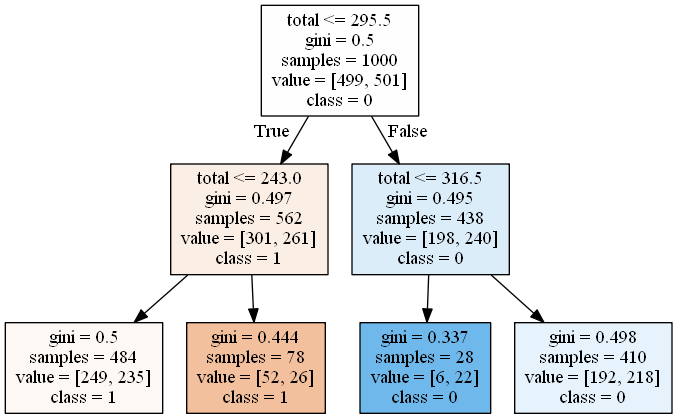

True

In [25]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='Gendertree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('Gendertree.dot')
Image(graph.create_png())
graph.write_pdf("Gendertree.pdf")

In the decision tree adove, we see that the machine learning model selected total spend as the predictor most indicative of purchaser gender. This decision tree indicates that females in this data set tended to spend less than their male counterparts. In this machine learning model, the shopers most likely to be male spent over $316. Interestingly, females are most likely to spend between $243 and $295, whereas shoppers spending less than this range are harder to predict.  The high gini values in this model show that the confidence in this model is low and that total and gender are not tightly coupled. 

In [26]:
#Run a second machine learning investigation for members and non-members
#drop dummy collumn coresponding to target variable


ss_mem=ss2.drop('cust_type_Normal',axis=1)
#convert total to integers
ss_mem = pd.DataFrame(ss_mem, dtype='int')
ss_mem.head()
#Assign X the dataframe without the Membership attribute
X2=ss_mem.drop('cust_type_Member',axis=1)
# Assign Y2 the Memebership attribute
Y2=ss_mem['cust_type_Member']

##### Create tree
dt2=tree.DecisionTreeClassifier(max_depth=2)
dt2.fit(X=X2,y=Y2)

,total,rating,cust_type_Member,electronics,fashion,food_beverages,health_beauty,home_lifestyle,sports_travel,female,cash,credit_card,ewallet,city_Mandalay,city_Naypyitaw,city_Yangon
0,548,9,1,0,0,0,1,0,0,1,0,0,1,0,0,1
1,80,9,0,1,0,0,0,0,0,1,1,0,0,0,1,0
2,340,7,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,489,8,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,634,5,0,0,0,0,0,0,1,0,0,0,1,0,0,1


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

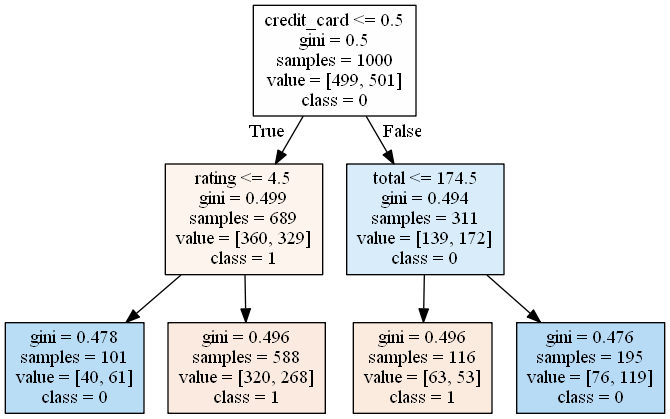

PermissionError: [Errno 13] Permission denied: 'Membertree.pdf'

In [27]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

#don't worry about the codes
dt2_feature_names = list(X2.columns)
dt2_target_names = np.array(Y2.unique(),dtype=np.str) 
tree.export_graphviz(dt2, out_file='Membertree.dot', 
    feature_names=dt2_feature_names, class_names=dt2_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('Membertree.dot')
Image(graph.create_png())
graph.write_pdf("Membertree.pdf")

In this second machine learning model, the alogorithym selected credit card use as the parameter most likely to predict if a consumer is or is not a member. After this intial watershed, rating and total are the next best predictors with members rating their experience slightly higher and spending less money. These two factors may indicate that the store is offering deals to members which make them buy products at lower prices which reduces their average spending but increases their satisfaction. Although it is somewhat trivial to interpret this chart as predicting whether someone is a member, it can be informative if we interpret it as showing the factors most likely to make someone interested in joining the membership program. 

## Conclusions

The trends we found in our data analysis and visualization are facinting, but are limited in their ability to inform business action. Because this data set was highly cleaned, we were not able to see the exact products that were purchased; we only had access to the product line of the transaction. This means we were not able to see if key products within each sector were driving purchases or had unique trends seperate from the product line as a whole. This limits our ability to market in a strategic way within each product category. Another limitation of this analysis is in extrapolation. This data was only collected at three supermarkets in Myanmar which is not a sample size large enough to generalize these trends to all consumers in Myanmar or emerging markets at large. Despite these limitation, this anaysis challenged our preconceptions about purchasing trends and offered an interesting look into the consumable product market landscape of Myanmar.